In [1]:
import numpy as np
import matplotlib.pyplot as plt

orbit plane is (x,y)

position of jet source as a function of ejection time $t_e$

$x(t_e) = r_0 \cos (\omega_B t_e)$

$y(t_e) = r_0 \sin (\omega_B t_e)$

precessing jet has initial velocity  vector

${\bf v}_j = v_j ( \sin \beta  \cos (\Omega_p t_e - \phi_0),
\sin \beta  \sin (\Omega_p t_e - \phi_0),  \cos \beta )$

together the initial velocity is 

$v_x(t_e)  = -r_0 \omega_B \sin (\omega_B t_e) + v_j  \sin \beta  \cos (\Omega_p t_e - \phi_0)$

$v_y(t_e)  = r_0 \omega_B \cos (\omega_B t_e) + v_j  \sin \beta  \sin (\Omega_p t_e - \phi_0)$

$v_z(t_e)  = v_j \cos \beta$

integrate

$x(t,t_e) = v_x(t_e) (t-t_e) + r_0 \cos (\omega_B t_e)$

$y(t,t_e) = v_y(t_e)  (t-t_e) + r_0 \sin (\omega_B t_e)$

$z(t,t_e) = v_z(t_e)  (t-t_e)$

$r_0$ is position of jet source from center of mass of binary.

$\beta$ is half opening angle of jet angle (angle between jet and orbit normal).

$\Omega_p t_e - \phi_0$ is jet precession angle (jet axis projected onto orbit plane).

$v_j$ is jet velocity. 

$\omega_B$ is mean motion of binary orbit. 

$t_e$ is ejection time for jet blob. 

$x,y,z$ are position of blob at current time $t$.

$\Omega_p$ is jet precession rate.

Choose $x$ axis from orbital plane in plane of sky and $z$ axis in plane of sky.
This means $y$ axis (in orbital plane) is along line of sight. 

Sky coordinates $x_s, y_s, z_s$ where $y_s$ is along line of sight.
For a right handed coordinate system, $z_s$ is to north, $x_s$ is to the right and $y_s$
increases away from viewer.

We want to rotate, so that we can tilt the orbit plane via inclination $i$. 
We rotate in $yz$ plane,   keeping $x$ untouched.

$\begin{pmatrix} x_s \\ y_s \\ z_s \end{pmatrix} = 
\begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos i & \sin i \\   0 & -\sin i & \cos i \end{pmatrix} 
\begin{pmatrix} x \\ y \\ z \end{pmatrix}  = 
\begin{pmatrix} x \\  y \cos iy + z\sin i  \\ -y\sin i  + z\cos i  \end{pmatrix}
$

Precession should have opposite sign as disk rotation.
If jet source disk is about the same direction as binary orbit normal then
 $\omega_B$ and $\Omega_p$ should have opposite signs.
Binary orbit normal is to south so we should add 180 degrees to position angle of axis of symmetry
Also jet is in opposite direction to binary orbit normal so $v_j$ should be negative. 


Suppose we allow damping 

The initial velocity is still

$v_x(t_e)  = -r_0 \omega_B \sin (\omega_B t_e) + v_j  \sin \beta  \cos (\Omega_p t_e - \phi_0)$

$v_y(t_e)  = r_0 \omega_B \cos (\omega_B t_e) + v_j  \sin \beta  \sin (\Omega_p t_e - \phi_0)$

$v_z(t_e)  = v_j \cos \beta$

However we let the velocity amplitude drop with travel time  
${\bf v}(t,t_e) = {\bf v}(t_e) e^{-\alpha (t-t_e)} $

integrate

${\bf x} = {\bf x}_0 + \frac{ {\bf v}(t_e)}{\alpha} (1 -  e^{-\alpha (t-t_e)} ) $

$x(t,t_e) = v_x(t_e) \frac{1}{\alpha}(1 - e^{-\alpha (t-t_e)}) + r_0 \cos (\omega_B t_e)$

$y(t,t_e) = v_y(t_e)  \frac{1}{\alpha}(1 - e^{-\alpha (t-t_e)}) + r_0 \sin (\omega_B t_e)$

$z(t,t_e) = v_z(t_e)  \frac{1}{\alpha}(1 - e^{-\alpha (t-t_e)}) $


tide should push down to binary orbital plane.
With disk high at +x, angular momentum vector is -x
torque is +y
That means precession is in opposite direction as disk rotation
This explains why Terquem+99 has a minus sign in the expression.
binary orbit direction not relevant

In [6]:
AUtopc = 1.5e13/3.0e18  # from AU to pc
#pc = 3.0e18 # cm
#G = 6.674e-8 # g m^3/s^2
G = 4.30091E-3 #  pc Msol^−1 (km/s)2  # gravitational constant in weird units


In [2]:
junk = np.loadtxt('propermotions.txt')  # read in proper motion table

# convert RA and DEC to radians
def RA_to_rad(RAh,RAm,RAs,DECrad):
    RArad= (RAh + RAm/60. + RAs/(60.*60.)) * 2*np.pi/24
    RArad *= np.cos(DECrad)
    return RArad
    
def DEC_to_rad(DECd,DECm,DECs):
    return (DECd + DECm/60 + DECs/(60.*60))*np.pi/180

RAh=junk[:,0]
RAm=junk[:,1]
RAs=junk[:,2]

DECd= junk[:,3]
DECm= junk[:,4]
DECs= junk[:,5]
DECrad = DEC_to_rad(DECd,DECm,DECs)   # convert to radians
RArad = RA_to_rad(RAh,RAm,RAs,DECrad)
dx_pp = junk[:,12]
dy_pp = junk[:,13]
vprop=junk[:,15]  #km/s
distance = 430.4 # pc, distance to HOPS361

vx = vprop*dx_pp/np.sqrt(dx_pp**2 + dy_pp**2)  #proper motion vector in km/s
vy = vprop*dy_pp/np.sqrt(dx_pp**2 + dy_pp**2)

# 5:47:4.631 +0:21:47.82  #Cheng HOPS361C position
DEC_HOPS361C  = DEC_to_rad(0.0,21.0,47.82)
RA_HOPS361C = RA_to_rad(5.0,47.0,4.631,DEC_HOPS361C)

x = -1*(RArad - RA_HOPS361C)*distance  # position of each knot
y = (DECrad - DEC_HOPS361C)*distance

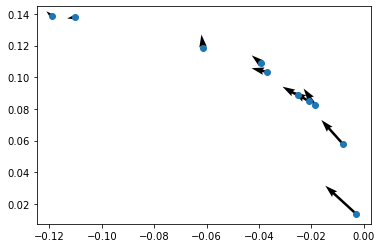

In [3]:
plt.plot(x,y,'o')
plt.quiver(x,y,vx,vy)

In [8]:
#Make a set of arrays for a single model
# parameters
# m1,m2 masses msol
# a_B_AU binary semi AU
# beta_deg half openning angle deg
# phi0 initial phase for precession radians
# incl inclination of orbit plane radians
# Omega_p_yr sets precession rate in yr-1
# te array of ejection times in Myrs
# t should be max of te (current time)
# PA_deg is position angle in deg
# alpha damping parm units Myr-1
sign_omega_B = 1.0
def mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha):
    beta = beta_deg*np.pi/180  # in radians, opening angle of jet
    a_B=  a_B_AU*AUtopc #binary semi-major axis, convert from AU to pc
    r0 = m2/(m1+m2) * a_B  # in pc - distance of m1 from Center of mass of binary
    # units pc
    # velocity of binary 
    v_B = np.sqrt(G*(m1+m2)/a_B)  # velocity of binary orbit in km/s which is pc/Myr
    # note: this is not w.r.t center of mass 
  
    omega_B = sign_omega_B*v_B/a_B  # is in Myr-1, angular rotation rate of binary (mean motion)
    # note that r0*omega_B < v_B
    Omega_p = Omega_p_yr*1e6  # units Myr-1, this is the precession rate 

    # compute velocities and positions
    # coordinate system xy orbital plane, z perpendicular to it
    #initial values
    vxarr_e = -r0*omega_B*np.cos(omega_B*te)+ vj*np.sin(beta)*np.cos(Omega_p*te - phi0)
    vyarr_e =  r0*omega_B*np.sin(omega_B*te)+ vj*np.sin(beta)*np.sin(Omega_p*te - phi0)
    vzarr_e =  vj*np.cos(beta)
    
    # instantaneous values for velocity 
    expfac = np.exp(-(t-te)*alpha)
    vxarr = vxarr_e*expfac
    vyarr = vyarr_e*expfac
    vzarr = vzarr_e*expfac
    
    # integrated positions
    slow_fac = (1.  - np.exp(-(t-te)*alpha))/alpha
    xarr = vxarr_e*slow_fac + r0*np.cos(omega_B*te)
    yarr = vyarr_e*slow_fac + r0*np.sin(omega_B*te)
    zarr = vzarr_e*slow_fac

    # rotate x,y,z to xs,ys,zs
    xsarr = xarr
    ysarr =  np.cos(incl)*yarr + np.sin(incl)*zarr
    zsarr = -np.sin(incl)*yarr + np.cos(incl)*zarr

    # also rotate velocities 
    vxsarr = vxarr
    vysarr =  np.cos(incl)*vyarr + np.sin(incl)*vzarr
    vzsarr = -np.sin(incl)*vyarr + np.cos(incl)*vzarr
    
    # rotate by position angle on sky from N
    PA = PA_deg*np.pi/180.
    
    xsarr_PA = np.cos(PA)*xsarr - np.sin(PA)*zsarr
    zsarr_PA = np.sin(PA)*xsarr + np.cos(PA)*zsarr
    
    return xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA


#plot different inclinations
def plt_stuff_slow(m1,m2,a_B_AU,beta_deg,phi0,Omega_p_yr,te,t,PA_deg,alpha,ddin_deg):
    
    # show jet blobs on sky
    fig,axarr = plt.subplots(1,5,figsize=(6,4),sharex=True,sharey=True,dpi=100)
    plt.subplots_adjust(hspace=0,wspace=0)
    for i in range(0,5):
        incl = i*ddin_deg*np.pi/180
        xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)
        axarr[i].plot(xsarr_PA,zsarr_PA,'-')
        axarr[i].set_aspect('equal')
    axarr[0].set_ylabel('(pc)')
    axarr[0].set_xlabel('(pc)')
    
    # show velocities propermotions and radial ones as a function of projected distance
    fig,axarr = plt.subplots(5,1,figsize=(6,4),sharex=True,sharey=True)
    plt.subplots_adjust(hspace=0,wspace=0)

    for i in range(0,5):
        incl = i*ddin_deg*np.pi/180
        xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)
    
        vpp = np.sqrt(vxsarr**2 + vzsarr**2)  # velocity on sky plane
        dsky = np.sqrt(xsarr**2  + zsarr**2)   # distance on sky from source
        axarr[i].plot(dsky,vpp,'b-')  #proper motion
        axarr[i].plot(dsky,vysarr,'g-')  # radial velocity
        #axarr[i].set_aspect('equal')
    axarr[4].set_xlabel('d (pc)')
    axarr[0].set_ylabel(r'$v_{pp}$ (km/s)')
    
    
    
# plot different inclinations
# along with data
# here x,y, are positions of knots
# vprop are proper motions in km/s
def plt_stuff_slow_data(m1,m2,a_B_AU,beta_deg,phi0,Omega_p_yr,te,t,PA_deg,alpha,ddin_deg,x,y,vprop):
    
    # show jet blobs on sky
    fig,axarr = plt.subplots(1,5,figsize=(6,4),sharex=True,sharey=True,dpi=100)
    plt.subplots_adjust(hspace=0,wspace=0)
    for i in range(0,5):
        incl = i*ddin_deg*np.pi/180
        xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)
        im=axarr[i].scatter(xsarr_PA,zsarr_PA,c=ysarr,s=5,cmap='viridis')
        axarr[i].set_aspect('equal')
        axarr[i].plot(x,y,'ro',ms=3)
    axarr[0].set_ylabel('(pc)')
    axarr[0].set_xlabel('(pc)')
    cax = fig.add_axes([0.93, 0.3, 0.015, 0.3])
    fig.colorbar(im, cax=cax)
    
    # show velocities propermotions and radial ones as a function of projected distance
    fig,axarr = plt.subplots(5,1,figsize=(6,4),sharex=True,sharey=True)
    plt.subplots_adjust(hspace=0,wspace=0)

    for i in range(0,5):
        incl = i*ddin_deg*np.pi/180
        xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)
    
        vpp = np.sqrt(vxsarr**2 + vzsarr**2)  # velocity on sky plane
        dsky = np.sqrt(xsarr**2  + zsarr**2)   # distance on sky from source
        axarr[i].plot(dsky,vpp,'b-')  #proper motion
        axarr[i].plot(dsky,vysarr,'g-')  # radial velocity
        axarr[i].plot(np.sqrt(x**2 + y**2), vprop+40,'ro')
        #axarr[i].set_aspect('equal')
    axarr[4].set_xlabel('d (pc)')
    axarr[0].set_ylabel(r'$v_{pp}$ (km/s)')

In [69]:
# show a best model, xy plane only
def show_modelxy(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile):
    # show jet blobs on sky
    fig,ax = plt.subplots(1,1,figsize=(4,4),dpi=100,facecolor='white')
    #ax1 = fig.add_axes[0.1,0.1,0.5,0.5]
    plt.subplots_adjust(hspace=0.1,wspace=0.1,top=0.99,right=0.90,bottom=0.15,left=0.10)
    
    ax.plot(0,0,'r+',ms=10,zorder=3)  #hops361C  +
    dpc = np.sqrt(x**2 + y**2) 
    fac = 1.1
    
    PA_deg_s=PA_deg-180
    njetx = np.cos(PA_deg_s*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    njety = np.sin(PA_deg_s*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    ax.plot([0,njetx],[0,njety],':',alpha=0.5,lw=1,zorder=1,color='black')  #central axis
    
    njetx1 = np.cos((PA_deg_s+beta_deg)*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    njety1 = np.sin((PA_deg_s+beta_deg)*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    njetx2 = np.cos((PA_deg_s-beta_deg)*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    njety2 = np.sin((PA_deg_s-beta_deg)*np.pi/180.0 + np.pi/2)*max(dpc)*fac
    ax.plot([0,njetx1],[0,njety1],':',alpha=0.7,lw=1,zorder=1,color='orange')  #central axis + openning angle
    ax.plot([0,njetx2],[0,njety2],':',alpha=0.7,lw=1,zorder=1,color='orange')  #central axis + openning angle
    
    incl = incl_deg*np.pi/180  # make model
    xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)

    im=ax.scatter(xsarr_PA,zsarr_PA,c=ysarr,s=10,cmap='rainbow',zorder=2)  # model
    ax.set_aspect('equal')
    ax.plot(x,y,'ro',ms=6,zorder=3)  #data
    ax.set_ylabel(r'$z_s$ (pc)')
    ax.set_xlabel(r'$x_s$ (pc)')
    cax = fig.add_axes([0.80, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cax)
    cax.text(0,0.055,r'$y_s$ (pc)')
    
    if (len(ofile)>3):
        plt.savefig(ofile,dpi=250)
    
def show_model_rest(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile):
    fig,axarr = plt.subplots(4,1,figsize=(4.5,6),dpi=100,sharex=True,facecolor='white')
    plt.subplots_adjust(hspace=0.0,wspace=0.0,top=0.99,right=0.98,bottom=0.15,left=0.2)
    
    incl = incl_deg*np.pi/180  #make model
    xsarr,ysarr,zsarr,vxsarr,vysarr,vzsarr,xsarr_PA,zsarr_PA = \
            mkarrs_slow(m1,m2,a_B_AU,beta_deg,phi0,incl,Omega_p_yr,te,t,PA_deg,alpha)
    
    # find times of knots in model
    dpc = np.sqrt(x**2 + y**2) # distance on sky of knots
    klist = np.zeros(0,dtype=int)
    for k in range(len(x)):
        dmod2 =  (x[k]-xsarr_PA)**2 + (y[k]-zsarr_PA)**2  # find closest point in model to data
        kmin = np.argmin(dmod2)
        klist = np.append(klist,kmin)

    print(klist)
    vpp  = np.sqrt(vxsarr**2 + vzsarr**2) # velocity on sky plane
    dsky = np.sqrt(xsarr**2 + zsarr**2)   # distance on sky from source
    
    i=0
    axarr[i].plot(dsky,vpp,'b-',zorder=2,lw=2)  #proper motion
    axarr[i].plot(dpc, vprop+40,'ro',zorder=3,ms=5)  #data
    axarr[i].set_ylabel(r'$v_{pp}$ +40 (km/s)')
    
    i=1
    #axarr[i].plot(dsky,vysarr,'g-',zorder=2,lw=2)  # radial velocity
    axarr[i].scatter(dsky,vysarr,c=vysarr,s=10,cmap='coolwarm',zorder=2)
    axarr[i].set_xlabel('d (pc)')
    axarr[i].set_ylabel(r'$v_{r}$ (km/s)')
    
    i=2
    for k in range(len(klist)):
        kmin = klist[k]
        axarr[i].plot(dpc[k],te[kmin]*1e6,'ro',zorder=2,ms=5)
    axarr[i].set_ylabel(r'$t_e$ (yr)')
    
    i=3
    #axarr[i].plot(dsky,ysarr,'c-',zorder=2,lw=2)
    axarr[i].scatter(dsky,ysarr,c=ysarr,s=10,cmap='rainbow',zorder=2)
    axarr[i].set_ylabel(r'$y_s$ (pc)')
    axarr[i].set_xlabel('d (pc)')
    
    
    for i in range(4):
        ylow,yhigh = axarr[i].get_ylim()
        for k in range(len(klist)):
            axarr[i].plot([dpc[k],dpc[k]],[ylow,yhigh],'k:',alpha=0.4,zorder=1,lw=1)  # dotted lines
    
    
    if (len(ofile)>3):
        plt.savefig(ofile,dpi=250)
    
    


1/alpha 555.56 yr
phi_0 -9.00 degrees
[784 728 687 681 672 629 617 567 419 389]


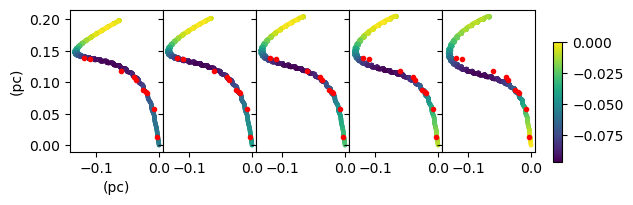

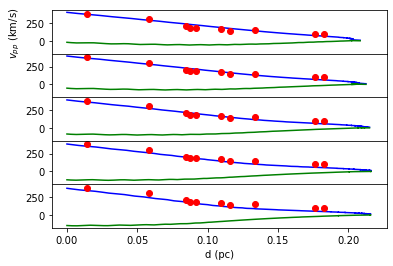

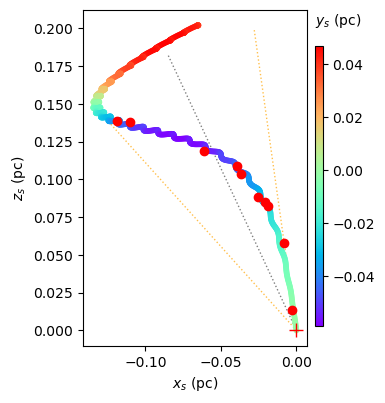

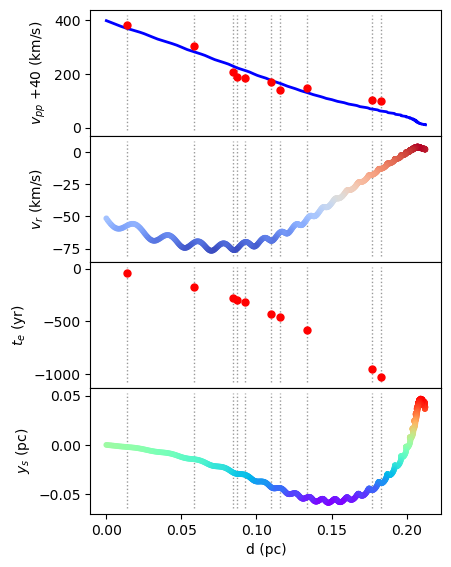

In [70]:
# Here is a  model!!!!! (older one)
# set te = array of ejection times, oldest ejection was at te=0
te = np.linspace(-2.0e-3,0,800)  #in Myrs, ejection times
#t = max(te)   # current time is the maximum of possible ejection times
# which should be 0 
t=0.

# chose parms again!
m1 =  1.0 # masses msol, jet source
m2 =  1.0 #  companion mass msol
a_B_AU = 20.0  # AU
beta_deg  = 17.0 # half opening angle for jet in degrees 
phi0 = -0.1*np.pi/2  # precession phase in radians, at current time
vj = -400.0  # jet velocity in km/s
#incl = 0.0  # inclination tilt of orbital z axis out of plane of sky in radians
P_prec = -2500.0 # precession period in yr
Omega_p_yr = 2*np.pi/P_prec # precesion rate yr-1 
PA_deg = 180+25.0 # position angle on sky to rotate from N, in degrees
alpha=1800. # how fast to slow velocity down, units Myr-1
#P = precession_period(a_B_AU,m1,m2,Omega_p_fac)
#print('P_precession = {:.0f} yr'.format(P*1e6))
print('1/alpha {:.2f} yr'.format(1/alpha *1e6))
print('phi_0 {:.2f} degrees'.format(phi0*180/np.pi))

ddin_deg = 5.0  # in degrees, how to step in inclination 

plt_stuff_slow_data(m1,m2,a_B_AU,beta_deg,phi0,Omega_p_yr,te,\
                    t,PA_deg,alpha,ddin_deg,x,y,vprop)

ofile="modxy_new.png"
incl_deg=5.0
show_modelxy(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile)

ofile="modv_new.png"
show_model_rest(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile)


1/alpha 526.32 yr
phi_0 -0.00 degrees
[784 730 689 684 674 632 626 570 413 379]


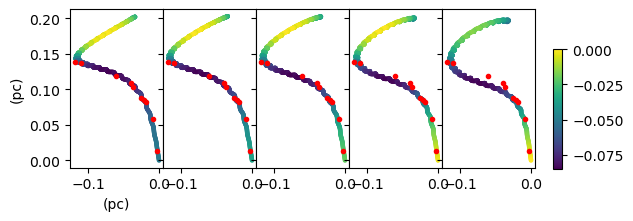

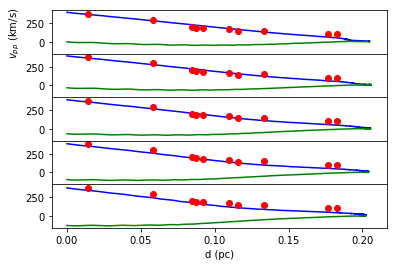

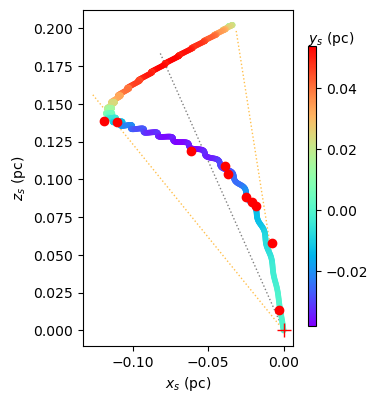

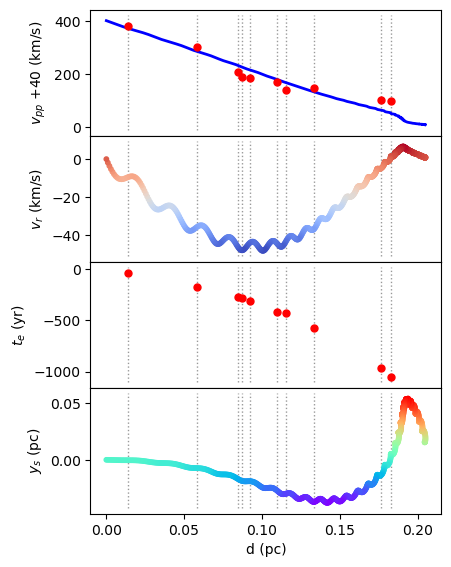

In [78]:
# another model that gives a good radial velocity at the GREAT position
# set te = array of ejection times, oldest ejection was at te=0
te = np.linspace(-2.0e-3,0,800)  #in Myrs, ejection times
#t = max(te)   # current time is the maximum of possible ejection times
# which should be 0 
t=0.

# chose parms again!
m1 =  1.0 # masses msol, jet source
m2 =  1.0 #  companion mass msol
a_B_AU = 20.0  # AU
beta_deg  = 15.0 # half opening angle for jet in degrees 
phi0 = -0.0*np.pi/2  # precession phase in radians, at current time
vj = -400.0  # jet velocity in km/s
#incl = 0.0  # inclination tilt of orbital z axis out of plane of sky in radians
P_prec = -2100.0 # precession period in yr
Omega_p_yr = 2*np.pi/P_prec # precesion rate yr-1 
PA_deg = 180+24.0 # position angle on sky to rotate from N, in degrees
alpha=1900. # how fast to slow velocity down, units Myr-1
#P = precession_period(a_B_AU,m1,m2,Omega_p_fac)
#print('P_precession = {:.0f} yr'.format(P*1e6))
print('1/alpha {:.2f} yr'.format(1/alpha *1e6))
print('phi_0 {:.2f} degrees'.format(phi0*180/np.pi))

ddin_deg = 5.0  # in degrees, how to step in inclination 

plt_stuff_slow_data(m1,m2,a_B_AU,beta_deg,phi0,Omega_p_yr,\
                    te,t,PA_deg,alpha,ddin_deg,x,y,vprop)
ofile="modxy_new2.png"
incl_deg=0.0  # chosen inclination of model
show_modelxy(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile)

ofile="modv_new2.png"
show_model_rest(m1,m2,a_B_AU,beta_deg,phi0,incl_deg,Omega_p_yr,te,t,PA_deg,alpha,x,y,vprop,ofile)


In [79]:
#print(x[0],y[0])
tt = np.arctan2(y[0],x[0])*180/np.pi
print('PA near origin {:.1f} deg'.format(tt-90))
# this is PA from the knots data

PA near origin 11.9 deg


In [ ]:
# below some order of mag estimates

In [123]:
tau_prec = 2200
sigma = 1.0/3.0
beta_rad = 17.0*np.pi/180.0
m_1=1.; m_2=1
q=m_2/m_1
tau_orbit = 15.0/32.0 * tau_prec* (q/np.sqrt(1+q)) * sigma**1.5 * np.cos(beta_rad)
print('bin orbital period = {:.0f} yr'.format(tau_orbit))

aa_B = np.power(tau_orbit,2.0/3.0)*np.power(m_1+m_2,1.0/3.0)
print('a_b = {:.1f} AU'.format(aa_B))

bin orbital period = 134 yr
a_b = 33.0 AU


In [1]:
A_V=10.0
N_H = 2e21*A_V # is cm-2
pc_cm = 3.08e18 #pc in cm
d = 0.1*pc_cm
nn_H = N_H/d
print('n_H {:.1e} cm-3'.format(nn_H))

n_H 6.5e+04 cm-3


In [12]:
n_H = 1e5 # cm-3
rho = 1.7e-24*n_H  # g cm-3
rho_msol_pc = rho/2e33 *(3e18)**3
# should be msol per pc^3
print(rho_msol_pc)

2295.0


In [13]:
print(rho_msol_pc*0.2**3)

18.360000000000003


In [17]:
#suppose eddy timescale is about 1km/s over a 1 pc which 
#corresponds to 1 Myr
#the luminosity of turbulence corresponds to
#20Msol*1km/s^2 / 1e6 yr 
Edot = 20*2e33*1e5**2 /(1e6*3e7) # in erg/s
print(Edot)
Ldot = Edot/4e33 
print(Ldot)

1.3333333333333332e+31
0.003333333333333333


In [19]:
#Dissipation rate is 
#Mcloud v_turb^3/l_eddy 200 Msol, 1km/s  1pc
Ldiss = 2000*2e33*1e5**3/(1*3e18) # erg
print(Ldiss)
print(Ldiss/4e33)

1.3333333333333332e+33
0.3333333333333333
